<a href="https://colab.research.google.com/github/tashir0605/Cocepts-And-Practice/blob/main/Pytorch/Dataset_and_DataLoader_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

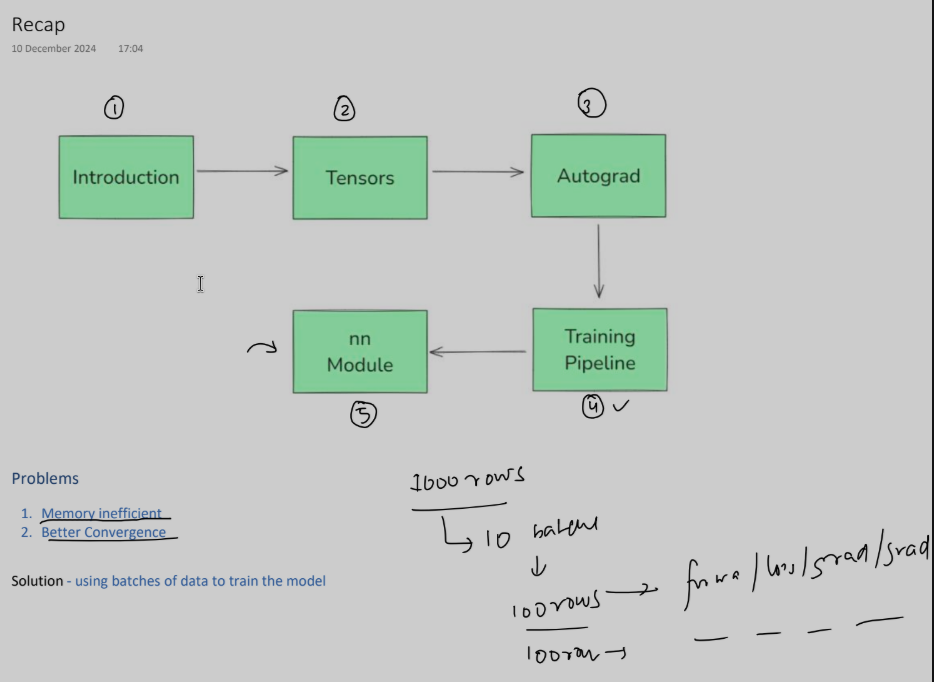

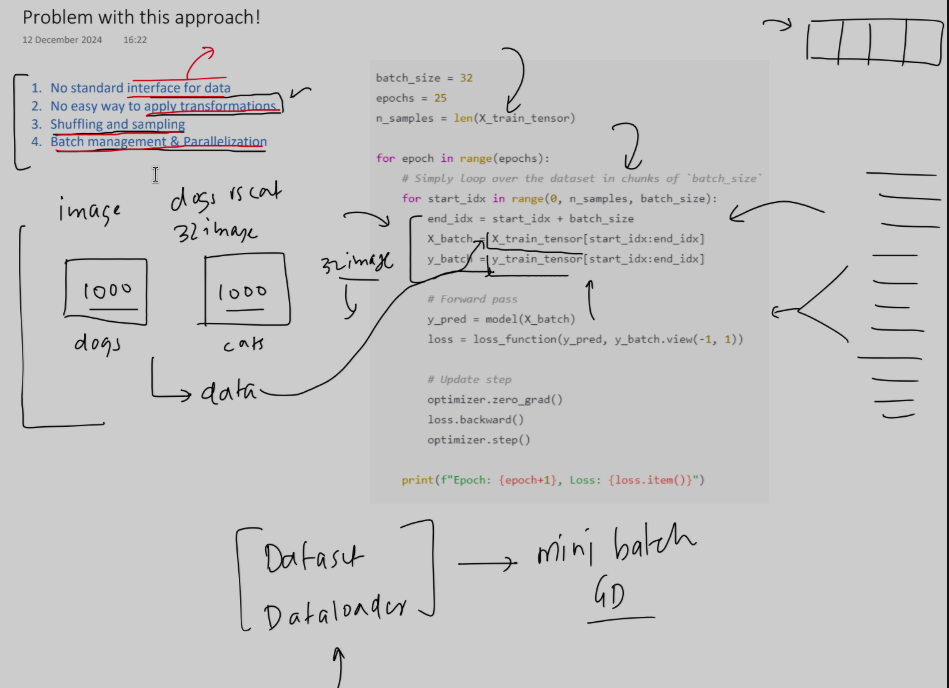

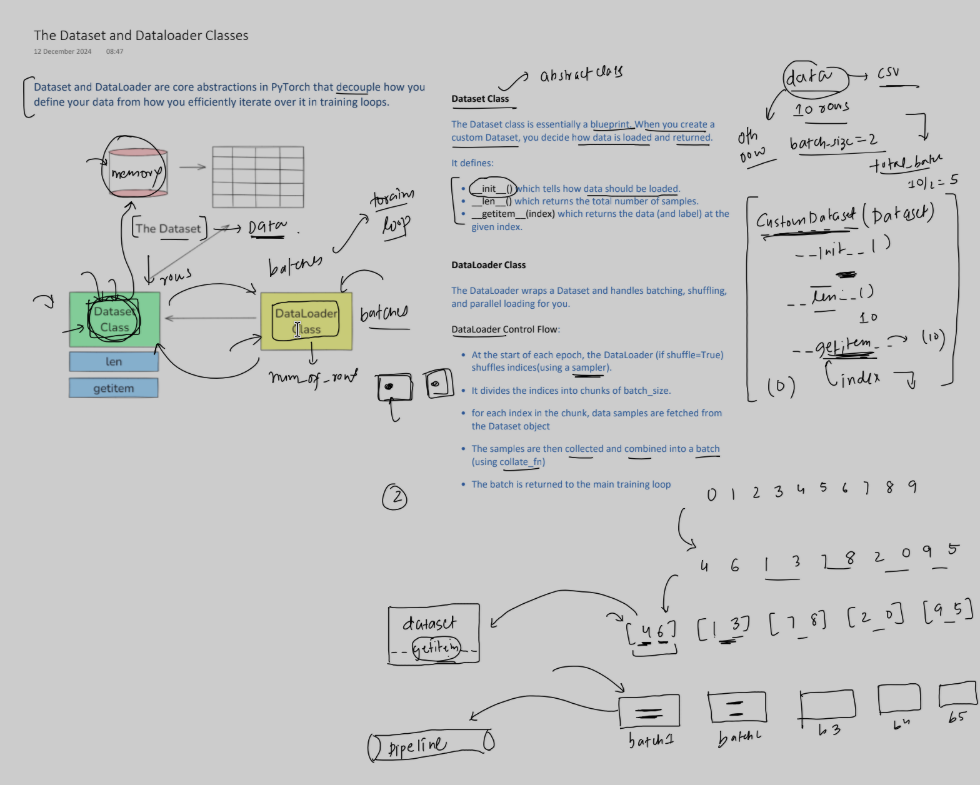

In [1]:
from sklearn.datasets import make_classification
import torch

In [3]:
# Step 1: Create a synthetic classification dataset using sklearn
X, y = make_classification(
    n_samples=10,       # Number of samples
    n_features=2,       # Number of features
    n_informative=2,    # Number of informative features
    n_redundant=0,      # Number of redundant features
    n_classes=2,        # Number of classes
    random_state=42     # For reproducibility
)

In [4]:
X

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [5]:
X.shape

(10, 2)

In [6]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [7]:
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.long)

In [8]:
y.type

<function Tensor.type>

In [9]:
X.type

<function Tensor.type>

In [10]:
from torch.utils.data import Dataset,DataLoader

In [ ]:
class CustomDataset(Dataset):
    def_init_(self,)